In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = pd.read_csv("../data/processed/processed_X.csv")
y = pd.read_csv("../data/processed/processed_y.csv")

In [2]:
# 1. PCA with all components
# ========================
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X)  # X = scaled features
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

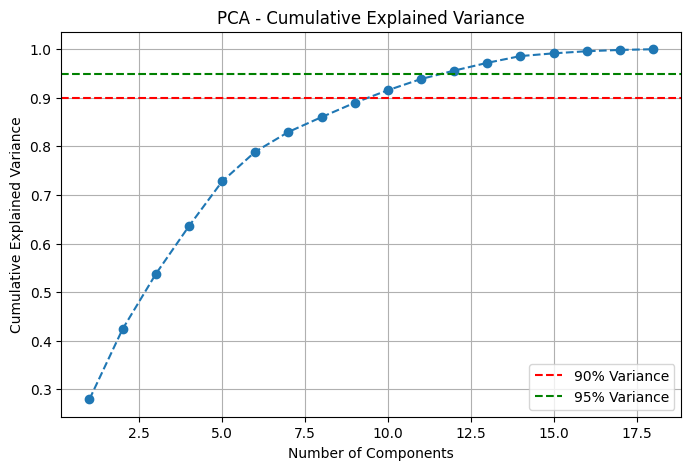

In [4]:
# 2. Plot Cumulative Variance
# ========================
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance,
         marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.axhline(y=0.95, color='g', linestyle='--', label="95% Variance")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# 3. How many components for 90% and 95% variance
# ========================
n90 = np.argmax(cumulative_variance >= 0.90) + 1
n95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to retain 90% variance: {n90}")
print(f"Number of components to retain 95% variance: {n95}")

Number of components to retain 90% variance: 10
Number of components to retain 95% variance: 12


In [6]:
# 4. PCA with n_components = 0.95 (auto choose)
# ========================
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)
print(f"Shape after PCA (95% variance): {X_pca_95.shape}")

Shape after PCA (95% variance): (303, 12)


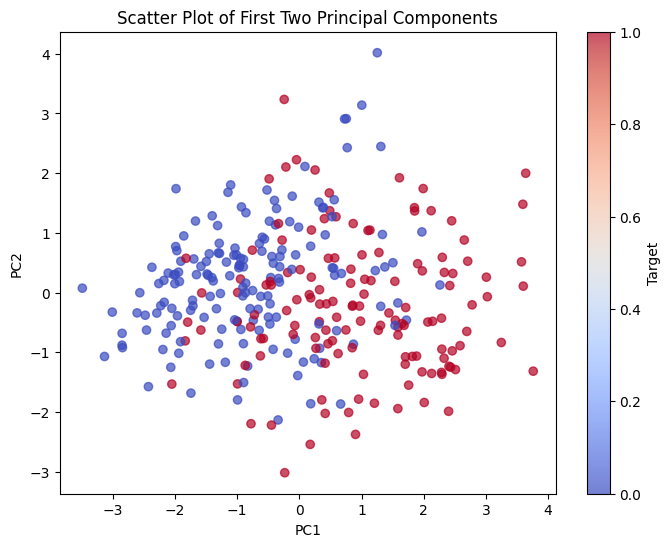

In [7]:
# 5. Scatter Plot with first 2 PCs
# ========================
plt.figure(figsize=(8,6))
plt.scatter(X_pca_full[:,0], X_pca_full[:,1], c=y.values.ravel(), cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot of First Two Principal Components")
plt.colorbar(label="Target")
plt.show()

In [10]:
pd.DataFrame(X_pca_95).to_csv("../data/processed/X_pca_95.csv", index=False)
y.to_csv("../data/processed/y_pca_95.csv", index=False)